# EDA

Hago un EDA preliminar sobre los datos extraídos de los PDFs

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from lib.data import load_extracted_samples

In [3]:
df = pd.json_normalize(load_extracted_samples())
df["has_text"] = df["text"].apply(lambda x: len(x) > 0)
df

,filename,size,pages,text,images,has_text
0,JohnsonThomas_2022-06-11.pdf,1048825,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
1,2022-03-30_7901.pdf,1464373,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
2,2023-04-15_6043.pdf,840231,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
3,2022-10-11_7517.pdf,46472,2,"Num: 752470592\nDue on: Oct 11, 2022\nHenry, A...",[],True
4,Email_Attachment_2022-11-28_1679.pdf,46540,2,"Inv#: Z38825880\nIssuance date: Nov 28, 2022\n...",[],True
...,...,...,...,...,...,...
8406,Email_Attachment_2022-11-01_3690.pdf,1928447,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
8407,F39879093.pdf,1904775,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False
8408,Incoming_inv_ParaisurZ996560_1893.pdf,47364,2,"Locator #: W88751753\nRecord date: May 14, 202...",[],True
8409,2021-08-04_6897.pdf,2553896,2,,[/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...,False


Text(0.5, 1.0, 'Tamaño del PDF')

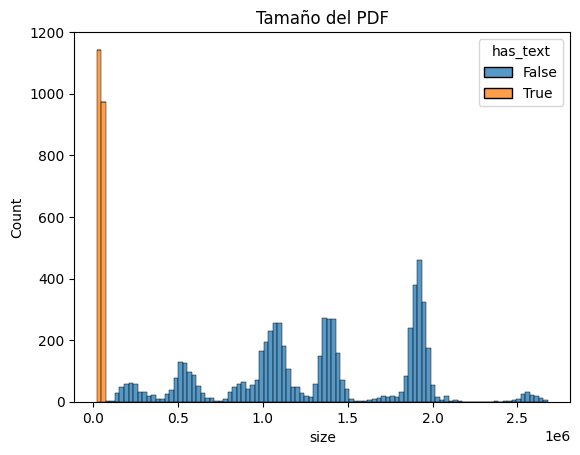

In [4]:
sns.histplot(df, x="size", hue="has_text", multiple="stack", bins=100).set_title("Tamaño del PDF")

En el gráfico de arriba se puede ver como se agrupan documentos con diferentes tamaños. Esto quizás puede usarse para clasificar los proveedores.

<Axes: >

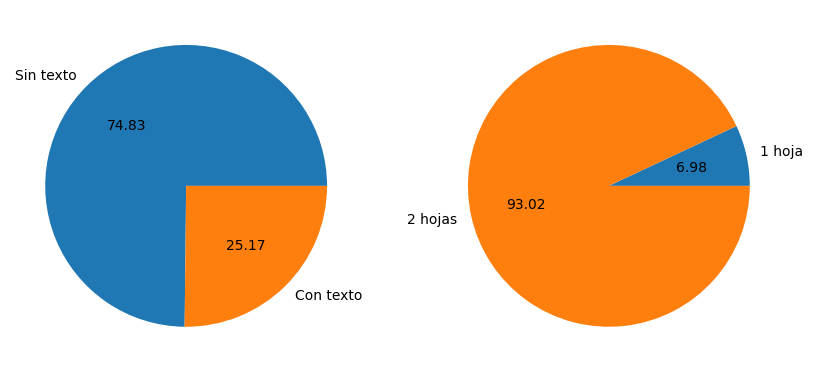

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df.groupby("has_text").size().plot.pie(ax=ax[0], autopct="%.2f", labels=["Sin texto", "Con texto"])
df.groupby("pages").size().plot.pie(ax=ax[1], autopct="%.2f", labels=["1 hoja", "2 hojas"])

In [6]:
# row of lowest size without text
print(df[(df["has_text"] == False) & (df["pages"] == 1)].sort_values(by="size").iloc[0])

filename                 Email_Attachment_2022-01-07_8411.pdf
size                                                    86633
pages                                                       1
text                                                         
images      [/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extr...
has_text                                                False
Name: 2950, dtype: object
